In [1]:
from numpy import *
import numpy as np

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = dataMat.mean(0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions    
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [2]:
dataMat = loadDataSet(r'F:\machine_learning_in_actions_my\Ch13_PCA\testSet.txt')

In [3]:
dataMat[0]

matrix([[ 10.235186,  11.321997]])

In [4]:
dataMat.mean(0)

matrix([[ 9.06393644,  9.09600218]])

In [5]:
lowDMat, reconMat = pca(dataMat, 1)

In [8]:
lowDMat.shape

(1000, 1)

In [9]:
reconMat.shape

(1000, 2)

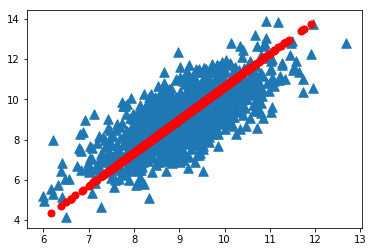

In [10]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

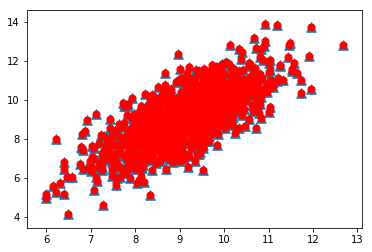

In [11]:
lowDMat, reconMat = pca(dataMat, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

In [12]:
def replaceNanWithMean(): 
    datMat = loadDataSet(r'F:\machine_learning_in_actions_my\Ch13_PCA\secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [13]:
dataMat = replaceNanWithMean()
dataMat.shape

(1567, 590)

In [14]:
meanVals = mean(dataMat, 0)
meanVals.shape

(1, 590)

In [15]:
meanRemoved = dataMat - meanVals
meanRemoved.shape

(1567, 590)

In [16]:
covMat = cov(meanRemoved, rowvar=0)
covMat.shape

(590, 590)

In [19]:
eigVals, eigVects = linalg.eig(mat(covMat))

In [21]:
print(eigVals.shape); len(eigVals)

(590,)


590

In [22]:
print(eigVects.shape); len(eigVects)

(590, 590)


590